# 2020a_4DVARQG
This notebook, associated to the configuration file *config_2020a_4DVARQG.py* runs a BFN-QG experiment to map SSH from simulated SWOT and Nadir data

## Configuration file

In [1]:
path_config = 'config_2022a_4DVARQG'

In [2]:
import sys
sys.path.append('..')

In [3]:

from src import exp
config = exp.Exp(path_config)

name_experiment: 2022a_4DVARQG
saveoutputs: True
name_exp_save: 2022a_4DVARQG
path_save: ../outputs/2022a_4DVARQG
tmp_DA_path: ../scratch/2022a_4DVARQG
init_date: 2012-02-01 00:00:00
final_date: 2012-03-01 00:00:00
assimilation_time_step: 1:00:00
saveoutput_time_step: 12:00:00
flag_plot: 1
write_obs: True
path_obs: ../obs/2022a_4DVARQG
name_lon: lon
name_lat: lat
name_time: time
plot_time_step: 1 day, 0:00:00
time_obs_min: None
time_obs_max: None
compute_obs: False



## State

In [4]:
from src import state as state
State = state.State(config)

super: GRID_CAR
lon_min: 230.0
lon_max: 239.5
lat_min: 30.0
lat_max: 39.5
dx: 25.0
name_init_mask: ../aux/aux_mdt_cnes_cls18_global.nc
name_var_mask: {'lon': 'longitude', 'lat': 'latitude', 'var': 'mdt'}



## Model

In [5]:
from src import mod as mod
Model = mod.Model(config,State)

super: MOD_QG1L_JAX
name_var: {'SSH': 'ssh'}
name_init_var: {}
dir_model: None
multiscale: False
dtmodel: 1200
time_scheme: Euler
upwind: 3
upwind_adj: None
Reynolds: False
c0: 2.7
filec_aux: None
name_var_c: {'lon': '', 'lat': '', 'var': ''}
cmin: None
cmax: None
only_diffusion: False
path_mdt: None
name_var_mdt: {'lon': '', 'lat': '', 'mdt': '', 'mdu': '', 'mdv': ''}
g: 9.81



In [6]:
from src import bc as bc
Bc = bc.Bc(config)

super: BC_EXT
file: ../../data/2022a_mapping_HFdynamic/mdt.nc
name_lon: lon
name_lat: lat
name_time: None
name_var: {'SSH': 'ssh'}
name_mod_var: {'SSH': 'ssh'}
dist_sponge: None

<xarray.Dataset>
Dimensions:  (lat: 200, lon: 200)
Coordinates:
  * lat      (lat) float64 20.0 20.1 20.2 20.3 20.4 ... 39.5 39.6 39.7 39.8 39.9
  * lon      (lon) float64 220.0 220.1 220.2 220.3 ... 239.6 239.7 239.8 239.9
Data variables:
    ssh      (lat, lon) float64 dask.array<chunksize=(200, 200), meta=np.ndarray>


## Observations

In [7]:
from src import obs as obs
dict_obs = obs.Obs(config,State)

Observation information will be saved in dict_obs_SWOT_ALG_C2_H2G_J2G_J2N_J3_S3A_20120201_20120301_230_239_30_39.txt
Reading dict_obs_SWOT_ALG_C2_H2G_J2G_J2N_J3_S3A_20120201_20120301_230_239_30_39.txt from previous run


In [8]:
from src import obsop as obsop
Obsop = obsop.Obsop(config,State,dict_obs,Model)

super: OBSOP_INTERP
path_save: None
compute_op: False
Npix: 4
mask_coast: False
dist_coast: 100
mask_borders: False



## Reduced Basis

In [9]:
from src import basis as basis
Basis = basis.Basis(config, State)

super: BASIS_BM
name_mod_var: ssh
flux: False
save_wave_basis: False
wavelet_init: True
facns: 1.0
facnlt: 2.0
npsp: 3.5
facpsp: 1.5
lmin: 80
lmax: 970.0
lmeso: 300
tmeso: 10
sloptdec: -1.0
factdec: 0.5
tdecmin: 0.0
tdecmax: 20.0
facQ: 1
Qmax: 0.03
slopQ: -2



## Assimilation

In [10]:
from src import inv as inv
inv.Inv(config,State,Model,dict_obs=dict_obs,Obsop=Obsop,Basis=Basis,Bc=Bc)

super: INV_4DVAR
compute_test: False
path_init_4Dvar: None
restart_4Dvar: True
gtol: 0.001
maxiter: 0
opt_method: L-BFGS-B
save_minimization: False
timestep_checkpoint: 6:00:00
sigma_R: 0.01
sigma_B: None
prec: True
prescribe_background: False
bkg_satellite: None
path_background: None
bkg_Kdiffus: 0.0
name_bkg_var: res
bkg_maxiter: 30
bkg_maxiter_inner: 10
largescale_error_ratio: 1
only_largescale: False

--> 270 checkpoints to evaluate the cost function
lambda=9.7E+02 nlocs=4.0E+00 tdec=1.0E+01 Q=2.1E-02
lambda=6.8E+02 nlocs=4.0E+00 tdec=1.0E+01 Q=2.1E-02
lambda=4.8E+02 nlocs=8.0E+00 tdec=7.9E+00 Q=2.1E-02
lambda=3.3E+02 nlocs=9.0E+00 tdec=5.6E+00 Q=2.1E-02
lambda=2.3E+02 nlocs=1.5E+01 tdec=3.9E+00 Q=1.3E-02
lambda=1.6E+02 nlocs=2.3E+01 tdec=2.7E+00 Q=6.3E-03
lambda=1.1E+02 nlocs=4.2E+01 tdec=1.9E+00 Q=3.1E-03
lambda=8.0E+01 nlocs=7.0E+01 tdec=1.3E+00 Q=1.5E-03


reduced order: 441180 --> 105282
 reduced factor: 4
Restart at: ../scratch/2022a_4DVARQG/X_it-2022-11-24_112804.nc
You ask for restart_4Dvar and maxiter==0, so we move directly to the saving of the trajectory

*** Saving trajectory ***




## Diagnostics

In [5]:
from src import diag as diag
Diag = diag.Diag(config,State)

super: DIAG_OSSE
dir_output: None
time_min: None
time_max: None
lon_min: None
lon_max: None
lat_min: None
lat_max: None
name_ref: ../../data/2022a_mapping_HFdynamic/dc_ref_eval/2022a_SSH_mapping_CalXover_eval*.nc
name_ref_time: time
name_ref_lon: lon
name_ref_lat: lat
name_ref_var: ssh
options_ref: {'parallel': True}
name_exp_var: ssh



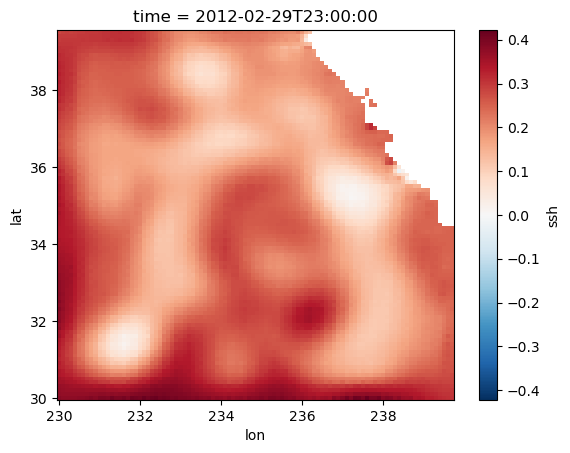

In [6]:
Diag.regrid_exp()
Diag.exp_regridded.ssh[-1].plot()

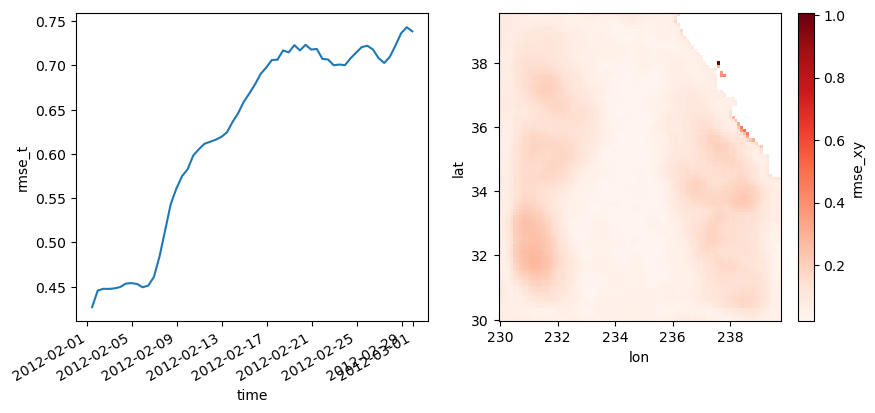

In [7]:
Diag.rmse_based_scores(plot=True)

/home/fleguillou/anaconda3/envs/env-plot/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/fleguillou/anaconda3/envs/env-plot/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


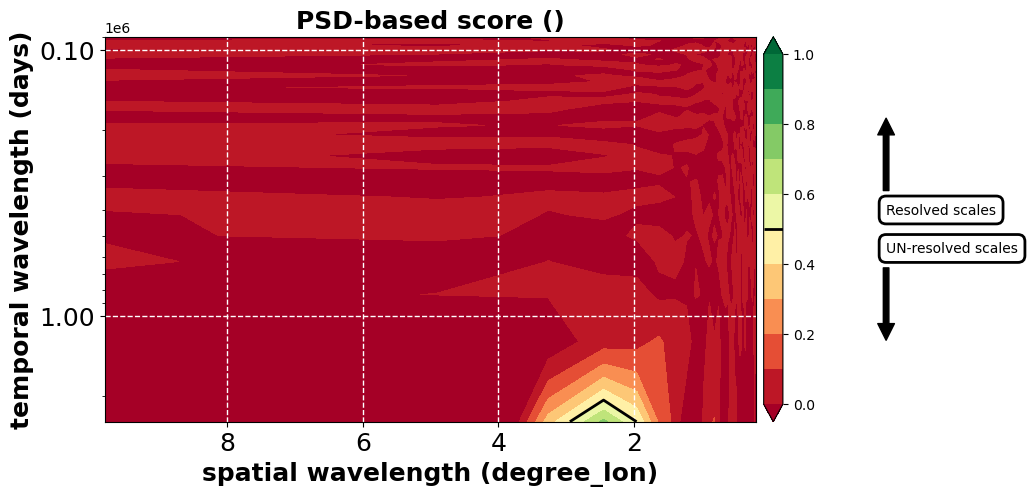

In [8]:
Diag.psd_based_scores(plot=True)

In [9]:
Diag.movie(framerate=12,clim=(0,.5),range_err=.2)

ffmpeg version 4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.3.0 (GCC)
  configuration: --prefix=/home/fleguillou/anaconda3/envs/env-plot --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1645955405450/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1645955405450/_build_env/bin/pkg-config
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  7.100 /  5.  7.100
  libswresample   3.  7.100 /  3.  7.100
  libpostproc

In [10]:
import os
from IPython.display import Video
Video(os.path.join(Diag.dir_output, 'movie.mp4'))

In [11]:
Leaderboard = Diag.Leaderboard()
Leaderboard

,Method,µ(RMSE),σ(RMSE),λx (degree),λt (days)
0,2022a_4DVARQG,0.59,0.11,1.96,24.05
